##  Imports

In [25]:
import pandas as pd
import requests
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [4]:
base = "https://api.coingecko.com/api/v3/"
url = base + "coins/bitcoin/market_chart"
param = {"vs_currency": "usd", "days":30}
result = requests.get(url, params=param)
result.status_code

200

In [17]:
j = result.json()
df_bc = pd.DataFrame(j["prices"], columns=["time", "price"])
df_bc["time"] = pd.to_datetime(df_bc["time"], unit="ms")
df_bc.set_index("time", inplace=True)
df_bc.head()

,price
time,
2020-07-26 10:01:02.129,9819.109104
2020-07-26 11:08:15.243,9987.357043
2020-07-26 12:08:25.901,9964.040808
2020-07-26 13:08:10.490,9859.954625
2020-07-26 14:07:02.810,9883.111241


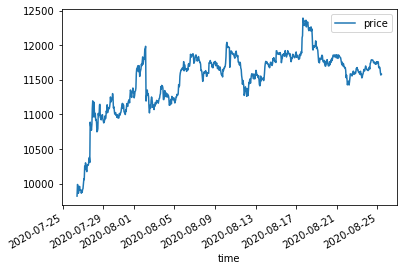

In [18]:
df_bc.plot()

# Litecoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [42]:
def get_coin_data(coin, days=30):
    """Returns market data for coin."""
    
    # Set up connection
    base = "https://api.coingecko.com/api/v3/"
    url = base + f"coins/{coin}/market_chart"
    param = {"vs_currency": "usd", "days": days}
    
    # Get data and save JSON
    result = requests.get(url, params=param)
    j = result.json()
    
    # Convert to dataframe
    df = pd.DataFrame(j["prices"], columns=["time", "price"])
    df["time"] = pd.to_datetime(df["time"], unit="ms")
    
    return df

df_lc = get_coin_data("litecoin")
df_lc.set_index("time", inplace=True)
df_lc.head()



,price
time,
2020-07-26 11:03:16.857,48.649353
2020-07-26 12:00:12.434,48.561413
2020-07-26 13:09:06.133,47.964552
2020-07-26 14:07:57.865,48.176288
2020-07-26 15:09:01.269,48.608722


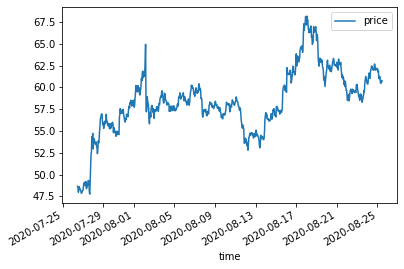

In [43]:
df_lc.plot()

## Plot Litecoin and Dogecoin prices in USD in a lineplot for each for the last 30 days

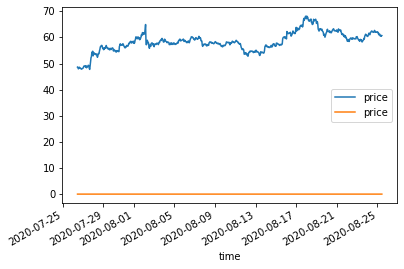

In [51]:
df_dc = get_coin_data("dogecoin")
df_dc.set_index("time", inplace=True)
#combi = pd.merge(df_lc, df_dc, how="left", on="time")
#combi.head()
fig, ax1 = plt.subplots()
df_lc.plot(ax=ax1)
df_dc.plot(ax=ax1)

# Top Ten Coins Report

## List the first 10 coingecko currencies in a DataFrame

In [52]:
base = "https://api.coingecko.com/api/v3/"
url = base + "coins/list"

# Get data
result = requests.get(url, params=param)
result.status_code

200

In [57]:
# Save JSON
j = result.json()
df = pd.DataFrame(j, columns=["id", "symbol", "name"])
df.head(10)

,id,symbol,name
0,01coin,zoc,01coin
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token
3,0-5x-long-balancer-token,balhalf,0.5X Long Balancer Token
4,0-5x-long-bilibra-token,trybhalf,0.5X Long BiLira Token
5,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash Token
6,0-5x-long-bitcoin-sv-token,bsvhalf,0.5X Long Bitcoin SV Token
7,0-5x-long-bitcoin-token,half,0.5X Long Bitcoin Token
8,0-5x-long-bitmax-token-token,btmxhalf,0.5X Long BitMax Token Token
9,0-5x-long-bnb-token,bnbhalf,0.5X Long BNB Token


## Make a csv called 'top_ten_report.csv' and check that it worked

In [58]:
df.to_csv("top_ten_report.csv")

In [59]:
pd.read_csv("top_ten_report.csv")

,Unnamed: 0,id,symbol,name
0,0,01coin,zoc,01coin
1,1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token
2,2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token
3,3,0-5x-long-balancer-token,balhalf,0.5X Long Balancer Token
4,4,0-5x-long-bilibra-token,trybhalf,0.5X Long BiLira Token
...,...,...,...,...
5873,5873,zvchain,zvc,ZVCHAIN
5874,5874,zxth,zxth,ZXTH
5875,5875,zynecoin,zyn,Zynecoin
5876,5876,zyx,zyx,ZYX
